**AMCAT EDA(1)**

**Data Description**
The dataset contains information on 3998 engineering graduates across 39 columns, including:

* Demographics: Gender, Date of Birth, Job City.

* Academic Performance: 10th and 12th percentages, college GPA.

* Job Details: Designation, Salary (target variable).

* Personality Traits: Conscientiousness, Agreeableness, Extraversion Neuroticism, Openness to experience.

* Specializations: Computer Science, Mechanical, Electrical, Telecom, Civil Engineering (binary values).

The data includes both numerical and categorical variables, with missing values represented as -1.


**Objective**

The primary objective of this analysis is to perform Exploratory Data Analysis (EDA) to uncover insights about the relationships between the variables, particularly focusing on the salary as the target variable. The analysis includes:

* Univariate analysis to explore the distribution of individual variables.

* Bivariate analysis to examine relationships between variables, such as between salary and academic performance, gender, or job roles.

* Testing specific research questions, such as:
 *  Whether job city influences salary.
 *  Whether academic performance impacts salary.
 *  Whether there is a gender preference for different specializations.

The insights derived from this analysis will help in understanding the factors that affect salary outcomes for engineering graduates and whether specific patterns exist based on academic performance, job location, or gender.

Let's first load and inspect the dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel('data.xlsx')
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [ ]:
df.shape

(3998, 39)

In [ ]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075


In [ ]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

The dataset contains 3998 rows and 39 columns. Below is a brief description of the data:

*  Target Variable: "Salary"

*  Columns: It includes features like "Designation", "Gender", "DOB", "10percentage", "12percentage", and others related to academics and personality traits such as "conscientiousness", "agreeableness", etc.

*  Some fields, such as "ComputerScience", "MechanicalEngg", and similar fields, have values of -1, possibly representing missing data.

Next, we will perform data clean-up processes.

In [6]:
# Replace -1 with NaN for easier handling of missing values
df.replace(-1, pd.NA, inplace=True)

# Drop rows with missing salary values, as it's the target variable
df.dropna(subset=['Salary'], inplace=True)

# Convert 'DOB' to datetime format and Gender to category
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['Gender'] = df['Gender'].astype('category')

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Dropping irrelevant columns (e.g., 'DOB')
data_cleaned = df.drop(['DOB'], axis=1)

df.head()


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,<NA>,<NA>,<NA>,<NA>,<NA>,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,<NA>,<NA>,<NA>,<NA>,<NA>,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,<NA>,<NA>,<NA>,<NA>,<NA>,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,<NA>,<NA>,<NA>,<NA>,<NA>,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


Next, we will perform univariate analysis, focusing on numerical columns and visualizing distributions.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

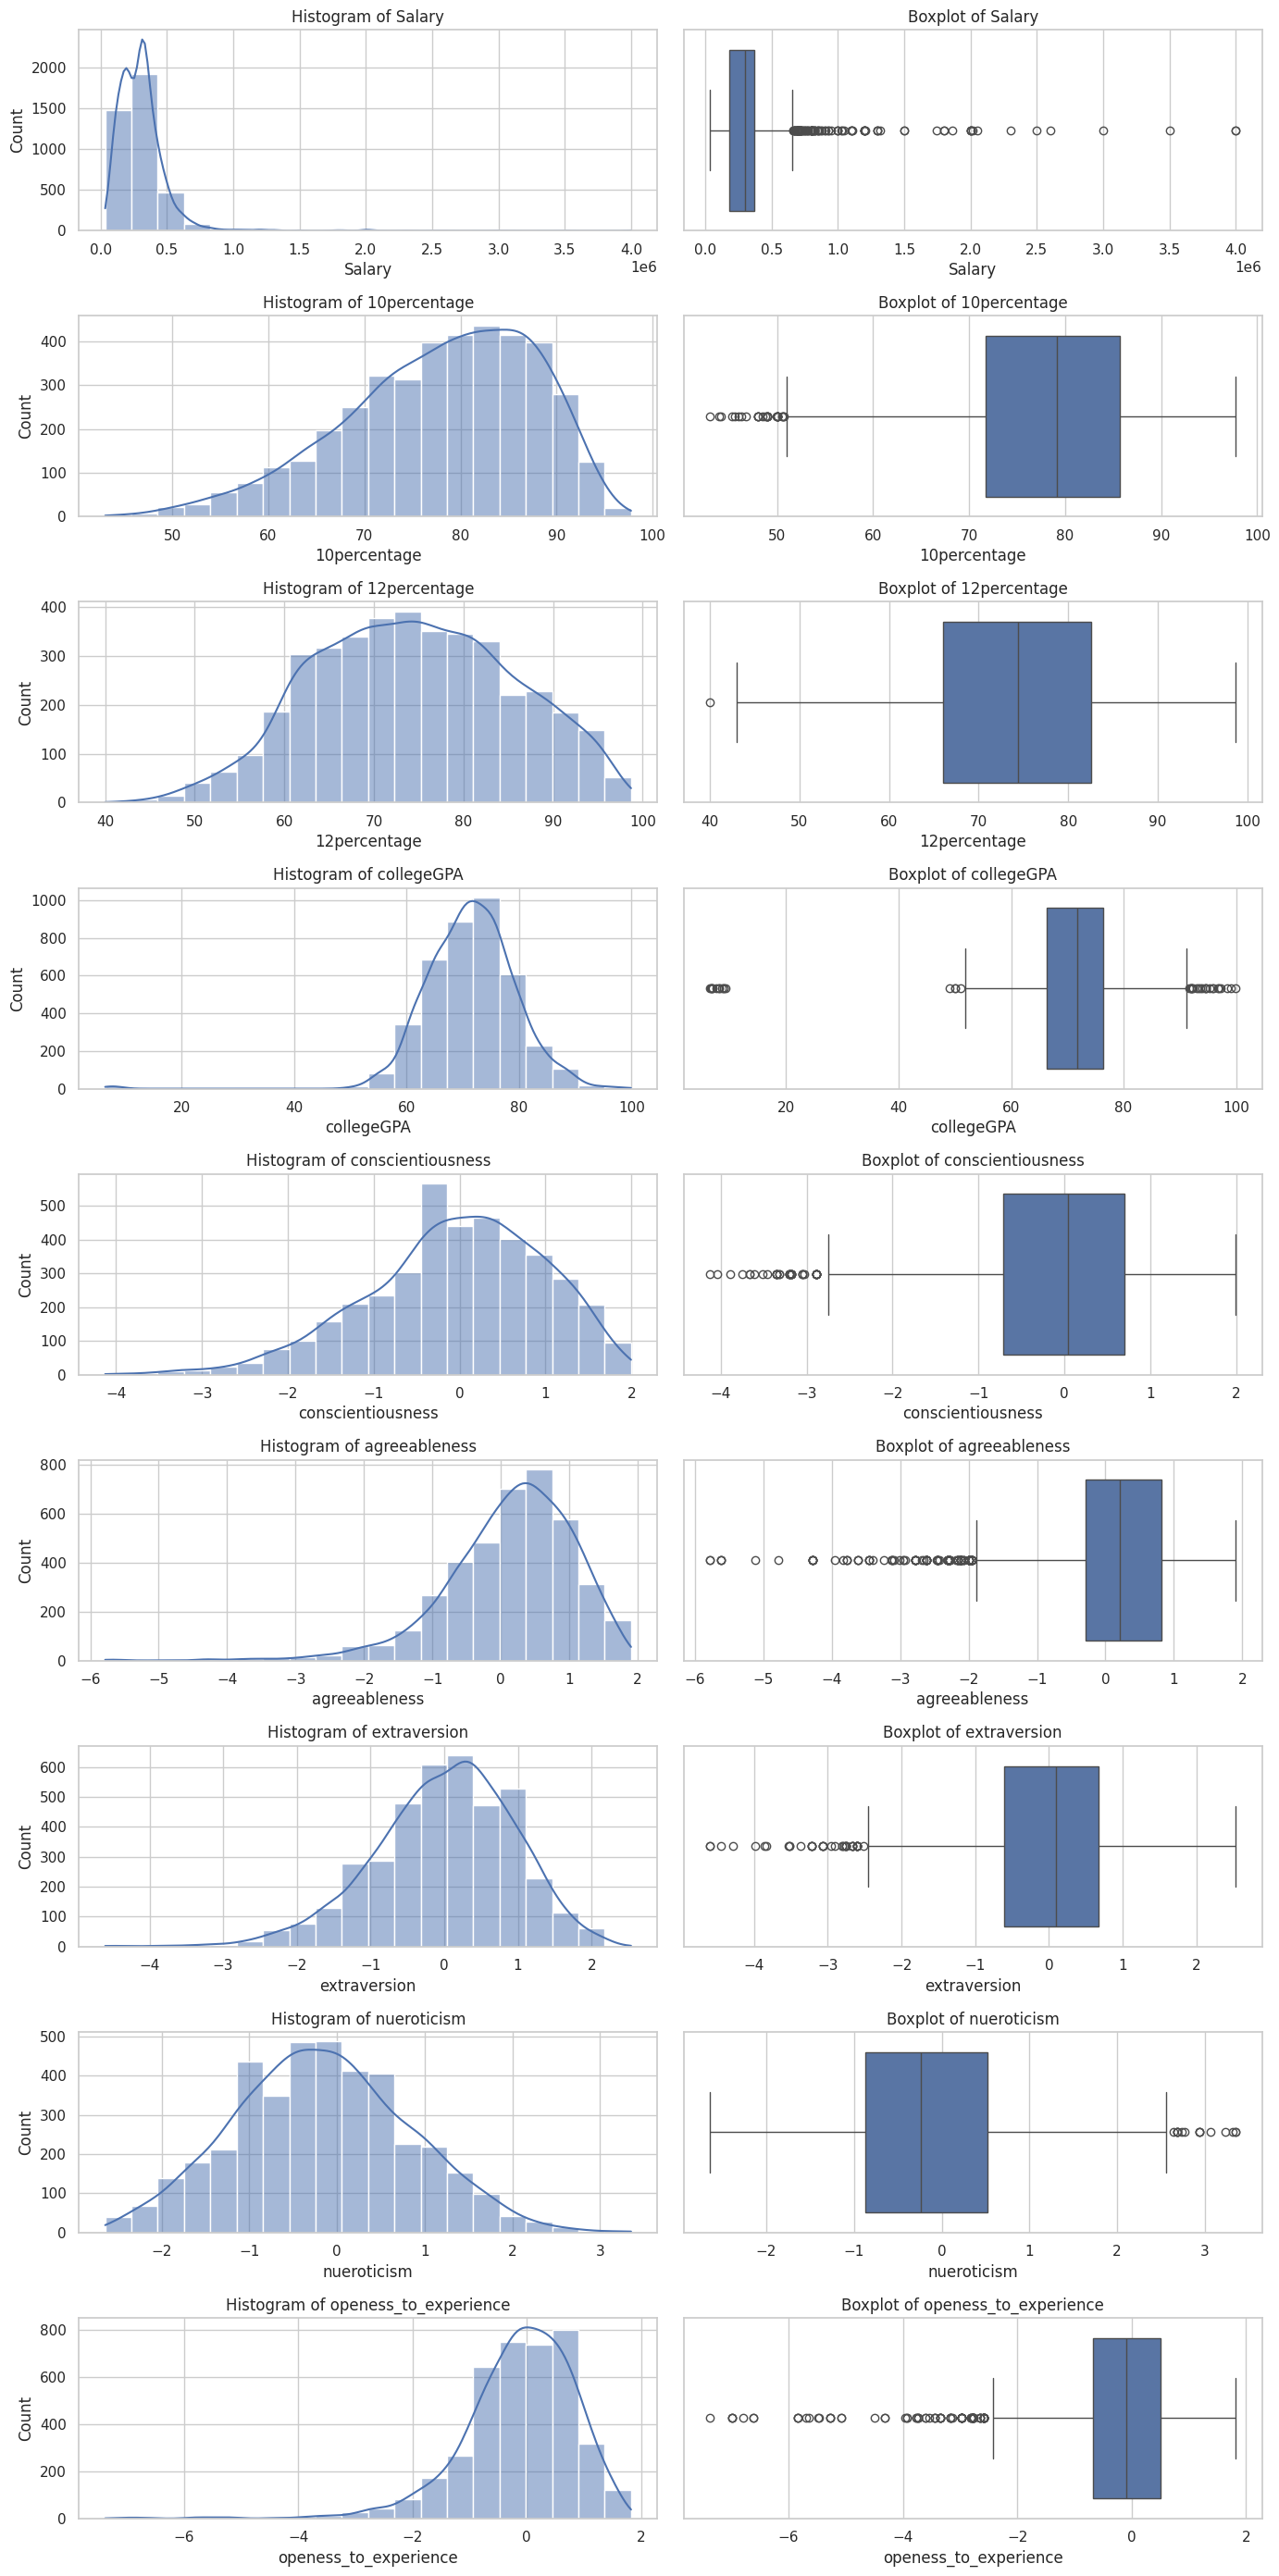

In [7]:

# Setting up the plotting style
sns.set(style="whitegrid")

# Plotting histograms for numerical columns and boxplots to detect outliers
numerical_columns = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'conscientiousness',
                     'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']

# Creating subplots
fig, axes = plt.subplots(len(numerical_columns), 2, figsize=(14, 28))

for i, col in enumerate(numerical_columns):
    # Histogram
    sns.histplot(df[col].dropna(), ax=axes[i, 0], kde=True, bins=20)
    axes[i, 0].set_title(f"Histogram of {col}")

    # Boxplot to detect outliers
    sns.boxplot(df[col].dropna(), ax=axes[i, 1], orient='h')
    axes[i, 1].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


The univariate analysis of the numerical columns reveals several important insights:


*   Salary: There is a wide range of salaries, with several outliers visible in the boxplot, indicating some individuals earn significantly higher or lower than others.

*   10percentage, 12percentage, and collegeGPA: These show relatively normal distributions, with most students scoring between 60% and 90%. There are some outliers in all three.

*  Personality Traits: Traits like "conscientiousness," "agreeableness," and others are mostly centered around 0, as expected for standardized scores, but some extreme values (outliers) are present.

Next, we will analyze the categorical variables and their distributions.

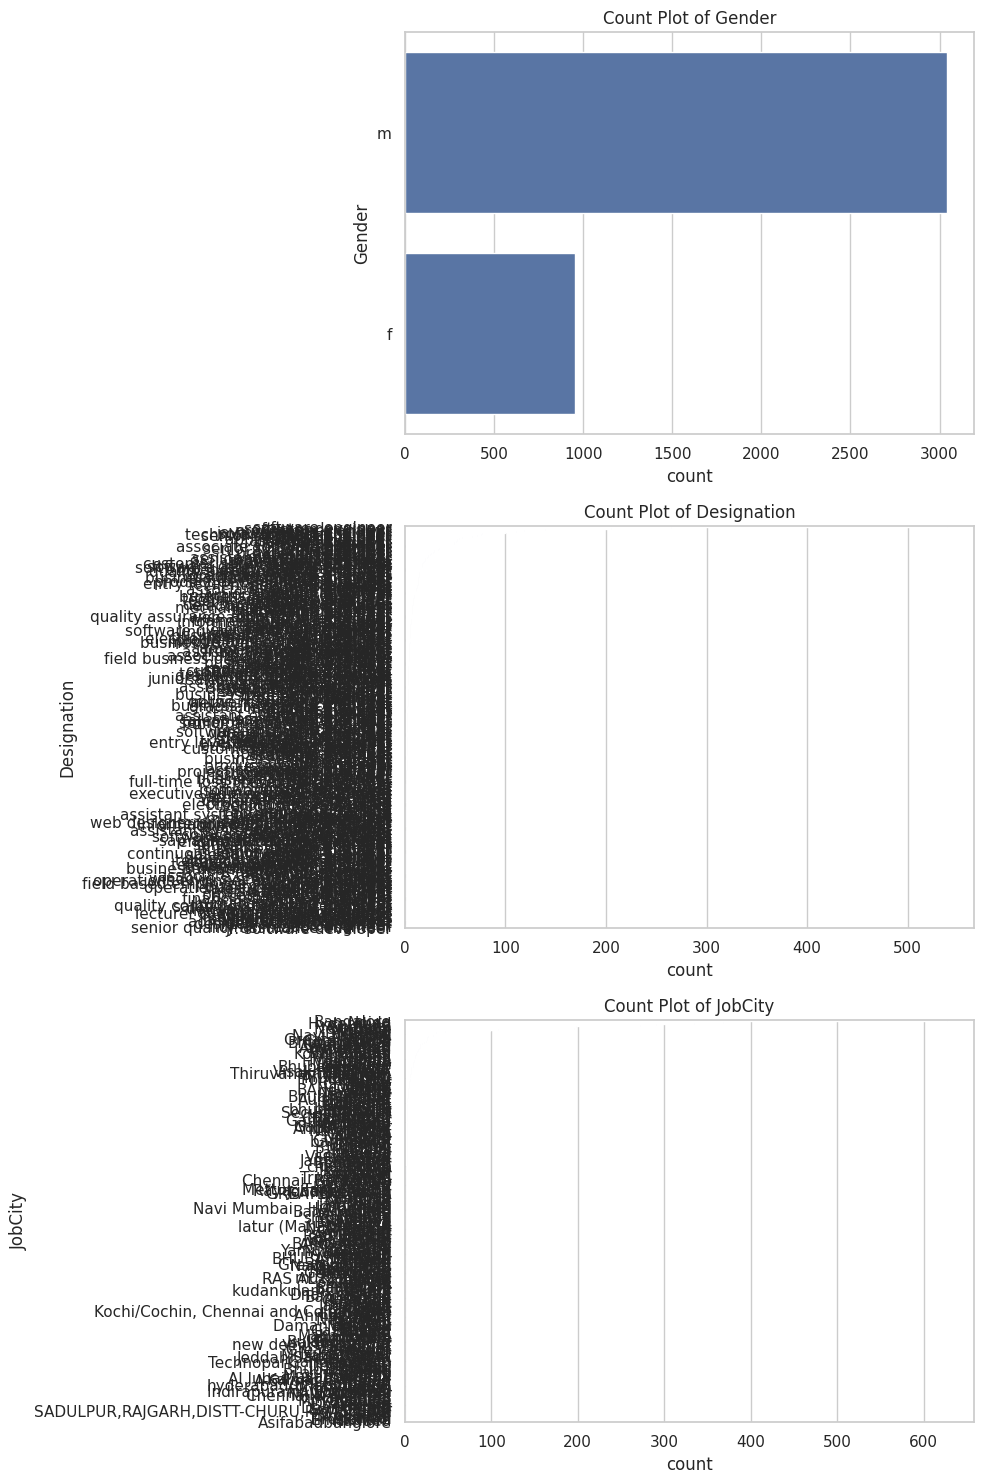

In [8]:
# Plotting the count distribution of categorical columns
categorical_columns = ['Gender', 'Designation', 'JobCity']

# Setting up the plot
fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, 15))

for i, col in enumerate(categorical_columns):
    sns.countplot(y=df[col], ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


The count plots for the categorical columns show the following:

*  Gender: There are more males than females in the dataset.

*  Designation: There is a wide variety of designations, with "software engineer," "systems engineer," and "senior software engineer" being the most common.

*  JobCity: Bangalore, Pune, and Hyderabad are the top job cities, reflecting common tech hubs.

Next, We'll proceed with the bivariate analysis to explore relationships between numerical and categorical variables, particularly focusing on salary as the target variable.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


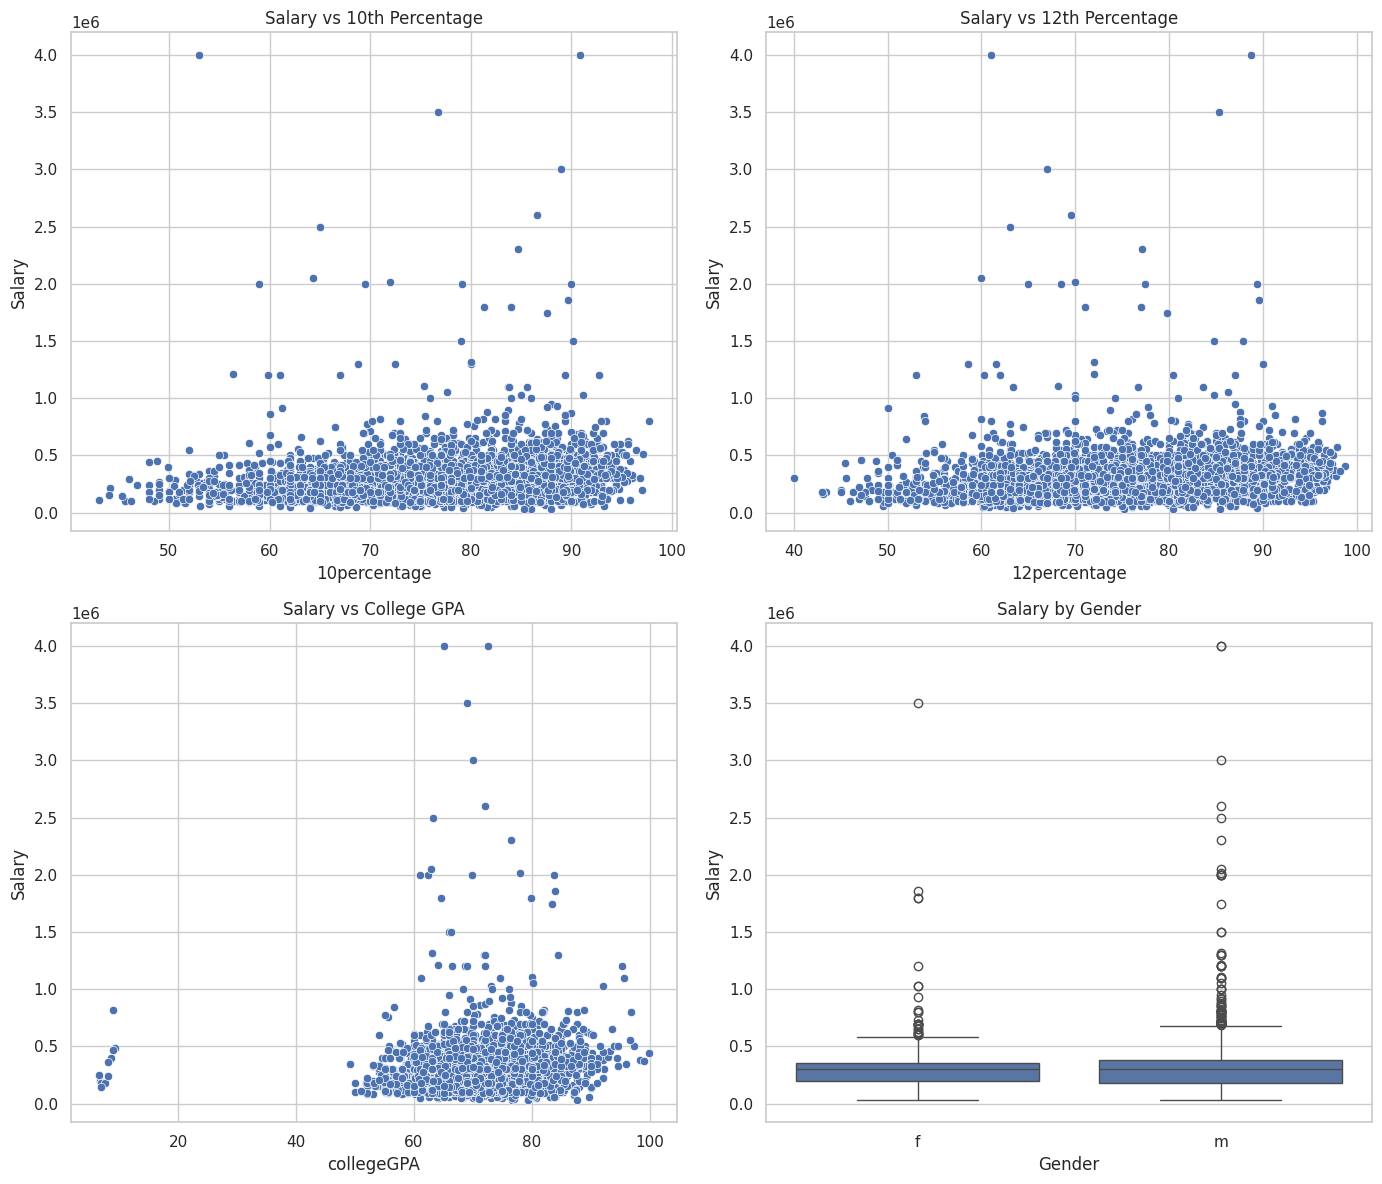

In [9]:
# Bivariate analysis: Scatter plot to see relationship between Salary and numerical features
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Scatter plots for salary against different numerical features
sns.scatterplot(data=df, x='10percentage', y='Salary', ax=axes[0, 0])
axes[0, 0].set_title('Salary vs 10th Percentage')

sns.scatterplot(data=df, x='12percentage', y='Salary', ax=axes[0, 1])
axes[0, 1].set_title('Salary vs 12th Percentage')

sns.scatterplot(data=df, x='collegeGPA', y='Salary', ax=axes[1, 0])
axes[1, 0].set_title('Salary vs College GPA')

sns.boxplot(data=df, x='Gender', y='Salary', ax=axes[1, 1])
axes[1, 1].set_title('Salary by Gender')

plt.tight_layout()
plt.show()


From the bivariate analysis:

*  Salary vs Academic Scores: There appears to be a weak relationship between salary and academic scores (10th, 12th percentages, and college GPA). The scatter plots show a wide distribution of salaries across various academic scores.

*  Salary by Gender: The box plot indicates that males tend to have slightly higher salaries compared to females, though the difference is not large.

Next, we will focus on analyzing the claim regarding specific job roles and their corresponding salaries(Research Question 1).

In [10]:
# Filter data to analyze specific job roles
roles = ['programming analyst', 'software engineer', 'hardware engineer', 'associate engineer']

# Filtering based on roles
filtered_data = df[df['Designation'].str.lower().isin(roles)]

# Checking if the average salary falls within the claimed range of 2.5-3 lakhs
mean_salary = filtered_data['Salary'].mean()
median_salary = filtered_data['Salary'].median()

mean_salary, median_salary, filtered_data['Salary'].describe()


(339792.0433996383,
 320000.0,
 count    5.530000e+02
 mean     3.397920e+05
 std      1.443991e+05
 min      6.000000e+04
 25%      2.500000e+05
 50%      3.200000e+05
 75%      4.000000e+05
 max      1.500000e+06
 Name: Salary, dtype: float64)

For the job roles of "programming analyst," "software engineer," "hardware engineer," and "associate engineer," the average salary is approximately ₹3.4 lakhs, and the median salary is ₹3.2 lakhs. This falls slightly above the claimed range of ₹2.5-3 lakhs mentioned in the article. The distribution shows that 25% of individuals earn at least ₹2.5 lakhs, with some salaries reaching as high as ₹15 lakhs.

Next, We'll analyze the relationship between gender and specializationn(Research Question 2).

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

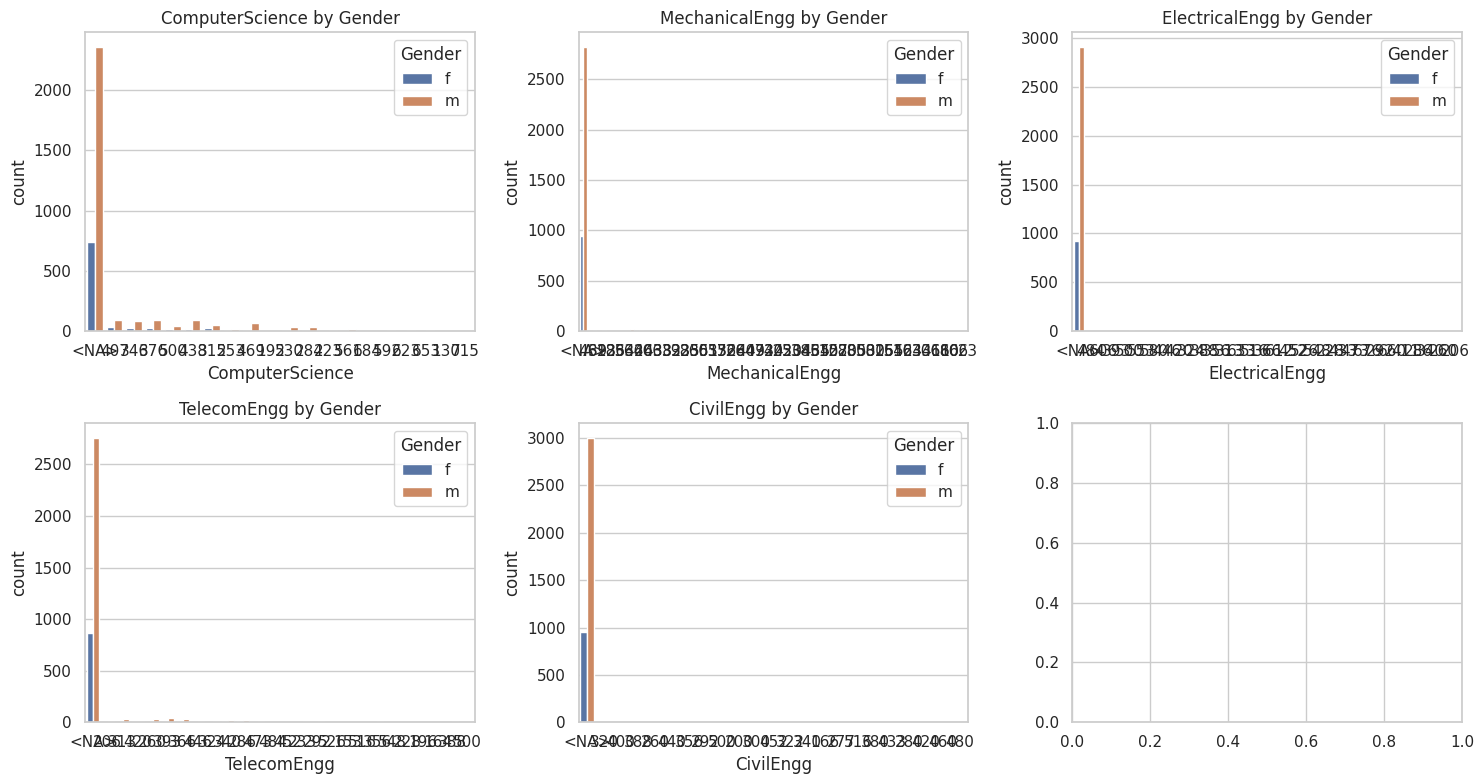

In [14]:
# Analyze the relationship between Gender and Specialization
specializations = ['ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg']
data_specialization = df[specializations + ['Gender']]

# Removing rows where all specializations are -1 (missing data)
specialization_data = data_specialization[(data_specialization[specializations] != -1).any(axis=1)]

# Convert specialization columns to string type to avoid ambiguity with -1
specialization_data[specializations] = specialization_data[specializations].astype(str)

# Count plot of specialization by gender
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
for i, col in enumerate(specializations):
    sns.countplot(x=col, hue='Gender', data=specialization_data, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f"{col} by Gender")
    axes[i // 3, i % 3].legend(title="Gender")

plt.tight_layout()
plt.show()

Based on the plots, there seems to be a relationship between gender and specialization preference as follows:

* Mechanical, Electrical, and Telecom Engineering: More male students are represented in these fields.

* Computer Science and Civil Engineering: The distribution of genders is more balanced.

* Potential factors: Societal stereotypes, educational opportunities, and personal interests might influence these preferences.

**Conclusion**

From the exploratory data analysis conducted, we can draw several important conclusions:

*  Data Overview:
The dataset contains 3998 records and 39 columns, with a mix of numerical, categorical, and date fields.
The target variable is "Salary," which exhibits a wide range of values.

*  Univariate Analysis:
Salary Distribution: Salaries are widely distributed, with several outliers earning significantly more than the majority.
Academic Performance: Most students scored between 60% and 90% in their 10th, 12th, and college GPA, though outliers exist.
Personality Traits: The personality traits (conscientiousness, agreeableness, extraversion, etc.) are standardized and center around 0, with some extreme values noted.

* Bivariate Analysis:
Salary vs Academic Scores: No strong relationship was observed between salary and academic scores, such as 10th and 12th percentages or college GPA.
Salary by Gender: Males tend to have slightly higher salaries than females, although the difference is not substantial.

* Times of India article claims test:
The claim from the Times of India that fresh graduates in specific engineering roles can earn between ₹2.5-3 lakhs holds true for many employees, with the median salary for roles like "software engineer" and "programming analyst" at ₹3.2 lakhs. However, some earn significantly more, with salaries reaching up to ₹15 lakhs.

* Relationship between gender and specialization:
A relationship between gender and specialization needs further investigation, but initial analysis shows that there are more males in the dataset, and the distribution of specializations may vary based on gender.
This concludes the EDA. The dataset highlights important patterns in salary distribution across job roles, gender, and academic performance, though further analysis is needed to deepen insights on specialization preferences.

**Research Question 3**: Does the job city influence salary?

This question aims to explore whether salaries differ significantly based on the job location, focusing on the top cities where jobs are concentrated.

Steps:

1.Analyze the distribution of salaries across different job cities.

2.Focus on cities with the highest number of jobs to ensure meaningful comparisons.

3.Use box plots to visualize the salary distributions.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


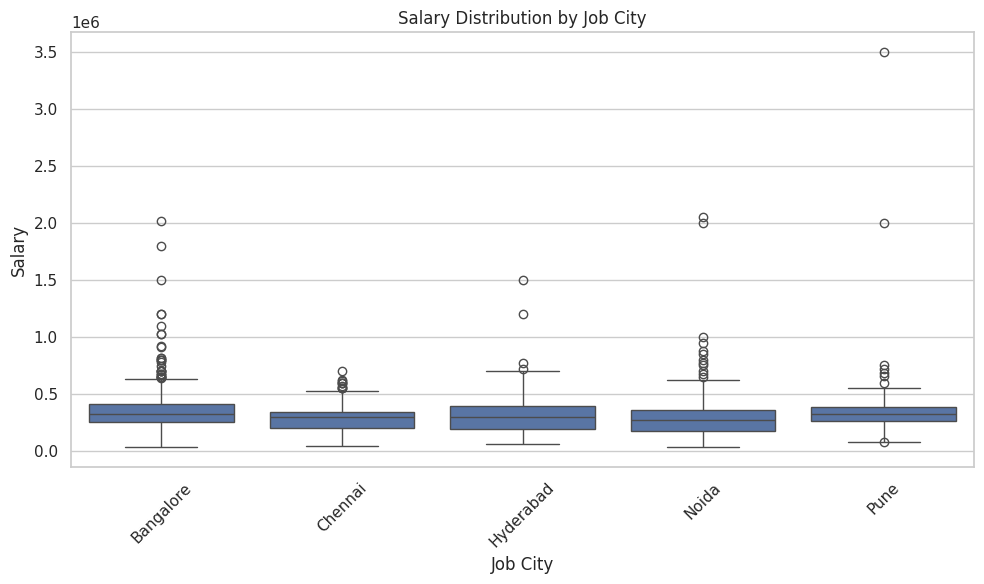

In [12]:
# Filter data to focus on the top 5 cities with the most job opportunities
top_cities = df['JobCity'].value_counts().index[:5]

# Filter the dataset for only these top cities
city_salary_data = df[df['JobCity'].isin(top_cities)]

# Plot a boxplot to show salary distribution by job city
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobCity', y='Salary', data=city_salary_data)
plt.title('Salary Distribution by Job City')
plt.xlabel('Job City')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Based on the box plot titled "Salary Distribution by Job City," it appears that job city does influence salary.
*  Median salaries: Relatively similar across cities.

*  Salary range: Varies across cities, with some cities having wider salary distributions.

*  Outliers: Present in some cities, indicating individual variations in salary.

*  Observation: Job city could be a factor influencing salary, but further analysis is needed to confirm this relationship.


**Research Question 4**: Is there a relationship between academic performance (college GPA) and salary?

This question explores whether better academic performance (measured by college GPA) leads to higher salaries. This will help in understanding if students with higher GPAs tend to receive better salary offers.

Steps:

1.Plot the relationship between college GPA and salary using a scatter plot.

2.Add a trend line to observe the direction and strength of the correlation.

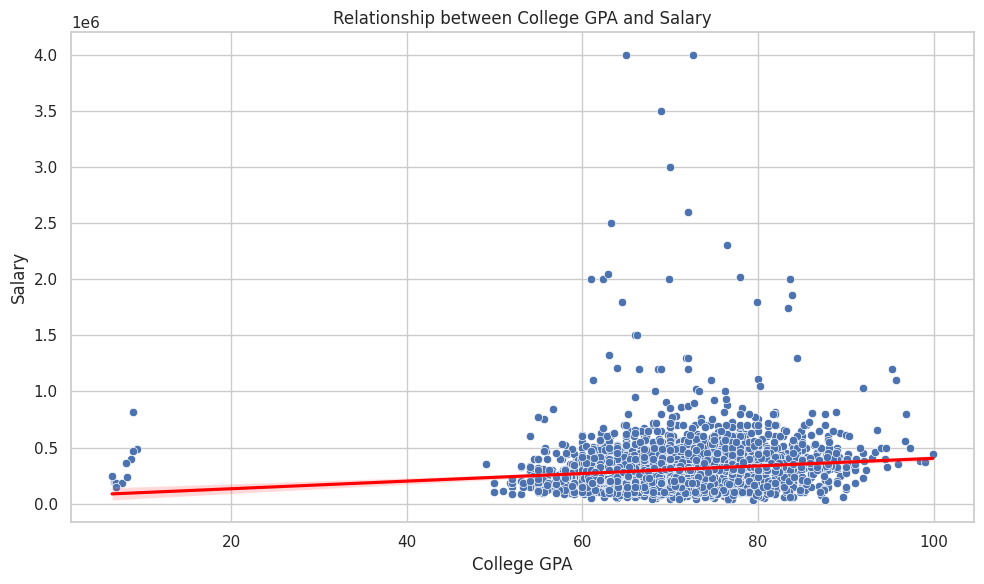

In [13]:
# Scatter plot to visualize the relationship between college GPA and Salary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='collegeGPA', y='Salary', data=df)

# Add a trend line to show the relationship
sns.regplot(x='collegeGPA', y='Salary', data=df, scatter=False, color='red')

plt.title('Relationship between College GPA and Salary')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()


Based on the scatter plot with a regression line, there appears to be a positive relationship between college GPA and salary. As college GPA increases, there's a general trend of higher salaries. However, there are also some individual variations, indicating that other factors might influence salary in addition to GPA.
*  Positive correlation: Higher GPA tends to be associated with higher salaries.

*  Individual variations: Other factors might influence salary, as there are some exceptions to the general trend.

*  Observation: College GPA could be one factor influencing salary, but further analysis is needed to understand the full impact.
